# Modelo de regresión lineal 2

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from regressors import stats

# Estilos
sns.set(style='whitegrid')

## Preprocesamiento y entrenamiento
* Solo con las variables con mayor correlación

In [ ]:
# Selección de columnas
df = pd.read_csv('../datos/procesados/procesado_life_expectancy.csv')
df = df[['Life expectancy', 'Adult Mortality', 'percentage expenditure', 'Diphtheria', 'HIV/AIDS', 'Schooling']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Life expectancy         2912 non-null   float64
 1   Adult Mortality         2912 non-null   float64
 2   percentage expenditure  2912 non-null   float64
 3   Diphtheria              2912 non-null   float64
 4   HIV/AIDS                2912 non-null   float64
 5   Schooling               2912 non-null   float64
dtypes: float64(6)
memory usage: 136.6 KB


In [10]:
# se selecciona la variable objetivo y los predictores
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']
X_cols = X.columns

# Se instancia el Scaler
scaler = StandardScaler()

# Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se escalan los datos y se convierten en df
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [11]:
# Instanciar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

## Métricas

In [12]:
# R² (Coeficiente de Determinación) Entre cero y uno, por encima de 0.7 puede llegar a ser un buen aceptable
r2 = round(r2_score(y_test, y_pred),3)

# Error Cuadrático Medio - Está en unidades cuadradas de la variable objetivo
mse = round(mean_squared_error(y_test, y_pred),3)

# Raiz del MSE (RMSE) - Está en las mismas unidades de la variable objetivo, entre más bajo mejor
rmse = round((mse ** 0.5), 3)

# Error relativo promedio - Menor al 10% Excelente, entre 11% y 20% Bueno, por encima de 30% necesita ajustes
error_relativo = round((rmse / df['Life expectancy'].mean() *100),3)

# Error absoluto medio (MAE) - Debe ser bajo en relación al rango de la variable objetivo
mae = round(mean_absolute_error(y_pred, y_test), 3)

In [13]:
# Resumen
stats.summary(modelo, X_test, y_test, X_cols)

Residuals:
    Min      1Q  Median     3Q     Max
-18.427 -2.9226 -0.1361 3.2194 26.3648


Coefficients:
                         Estimate  Std. Error   t value   p value
_intercept              69.406269    0.240819  288.2097  0.000000
Adult Mortality         -4.077713    0.272466  -14.9660  0.000000
percentage expenditure   1.767905    0.251377    7.0329  0.000000
Diphtheria               1.131031    0.259029    4.3664  0.000015
HIV/AIDS                -2.525513    0.261822   -9.6459  0.000000
Schooling                1.690850    0.271689    6.2235  0.000000
---
R-squared:  0.62039,    Adjusted R-squared:  0.61710
F-statistic: 188.59 on 5 features


In [14]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse} en unidades de la variablre objetivo")
print(f'Error relativo promedio: {error_relativo}')
print(f'MAE: {mae}')

r2: 0.62
mse: 33.81
Raíz del Error Cuadrático Medio (RMSE): 5.815 en unidades de la variablre objetivo
Error relativo promedio: 8.388
MAE: 4.181


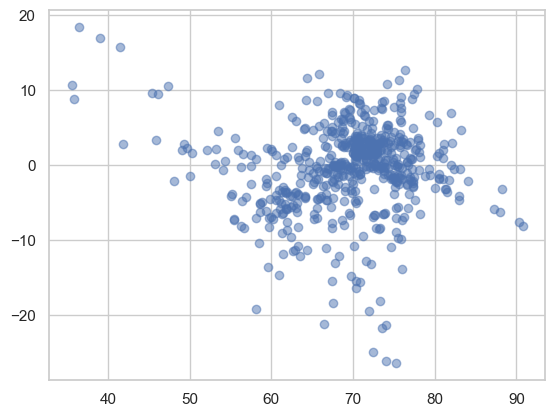

In [15]:
# Gráfico de residuales
residuales = np.subtract(y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()